<a href="https://colab.research.google.com/github/mohithxoxo/News-Scapper-and-Fake-News-Detection/blob/master/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
scraped=pd.read_csv('/content/news.csv')

In [ ]:
scraped.head()

,title,text,link,published,site
0,Rafik Hariri: Guilty verdict for lead suspect ...,(CNN) The lead suspect in the 2005 bombing tha...,http://edition.cnn.com/2020/08/18/middleeast/r...,2020-08-18T00:00:00,cnn
1,Israel is going into a second nationwide lockd...,Jerusalem (CNN) Israel has approved a second g...,http://edition.cnn.com/2020/09/14/middleeast/i...,2020-09-14T00:00:00,cnn
2,British-Iranian mother jailed in Tehran could ...,(CNN) A British-Iranian mother and charity wor...,http://edition.cnn.com/2020/09/13/middleeast/n...,2020-09-13T00:00:00,cnn
3,"Beirut port ablaze, weeks after massive blast","Beirut, Lebanon (CNN) A huge blaze broke out i...",http://edition.cnn.com/2020/09/10/middleeast/b...,2020-09-10T00:00:00,cnn
4,Iran court brings new charges against Nazanin ...,(CNN) The British government has condemned an ...,http://edition.cnn.com/2020/09/09/middleeast/i...,2020-09-09T00:00:00,cnn


In [ ]:
scraped['site'].value_counts()

breitbart         673
cnn               671
infowars           83
bbc                48
washingtonpost     25
Name: site, dtype: int64

In [ ]:
is_true1=(scraped['site']=='cnn')
is_true2=(scraped['site']=='bbc')
is_true3=(scraped['site']=='washingtonpost')
is_false1=(scraped['site']=='breitbart')
is_false2=(scraped['site']=='infowars')


In [ ]:
scraped.loc[is_true1,'label']='real'
scraped.loc[is_true2,'label']='real'
scraped.loc[is_true3,'label']='real'

In [ ]:
scraped.loc[is_false1,'label']='fake'
scraped.loc[is_false2,'label']='fake'

In [ ]:
scraped.columns

Index(['title', 'text', 'link', 'published', 'site', 'label'], dtype='object')

In [ ]:
# fake news dataset
fake=scraped.copy()

In [ ]:
fake.head()

,title,text,link,published,site,label
0,Rafik Hariri: Guilty verdict for lead suspect ...,(CNN) The lead suspect in the 2005 bombing tha...,http://edition.cnn.com/2020/08/18/middleeast/r...,2020-08-18T00:00:00,cnn,real
1,Israel is going into a second nationwide lockd...,Jerusalem (CNN) Israel has approved a second g...,http://edition.cnn.com/2020/09/14/middleeast/i...,2020-09-14T00:00:00,cnn,real
2,British-Iranian mother jailed in Tehran could ...,(CNN) A British-Iranian mother and charity wor...,http://edition.cnn.com/2020/09/13/middleeast/n...,2020-09-13T00:00:00,cnn,real
3,"Beirut port ablaze, weeks after massive blast","Beirut, Lebanon (CNN) A huge blaze broke out i...",http://edition.cnn.com/2020/09/10/middleeast/b...,2020-09-10T00:00:00,cnn,real
4,Iran court brings new charges against Nazanin ...,(CNN) The British government has condemned an ...,http://edition.cnn.com/2020/09/09/middleeast/i...,2020-09-09T00:00:00,cnn,real


In [ ]:
fake.shape

(1500, 6)

In [ ]:
fake.columns

Index(['Unnamed: 0', 'link', 'published', 'site', 'text', 'title', 'class'], dtype='object')

In [ ]:
fake.rename(columns={'class':'label'},inplace=True)

In [ ]:
fake['label'].value_counts()

fake    756
real    744
Name: label, dtype: int64

In [ ]:
data = fake.copy()

In [ ]:
dd=data["title"].duplicated() 

In [ ]:
final_data=data[~dd]

In [ ]:
final_data.shape

(1119, 6)

In [ ]:
final_data.label.unique()

array(['real', 'fake'], dtype=object)

In [ ]:
final_data.columns

Index(['text', 'link', 'published', 'site', 'label'], dtype='object')

In [ ]:
final_data=data.drop(['link','site','published','title'],axis=1)

In [ ]:
final_data.columns

Index(['text', 'label'], dtype='object')

In [ ]:
final_data.head()

,text,label
0,(CNN) The lead suspect in the 2005 bombing tha...,real
1,Jerusalem (CNN) Israel has approved a second g...,real
2,(CNN) A British-Iranian mother and charity wor...,real
3,"Beirut, Lebanon (CNN) A huge blaze broke out i...",real
4,(CNN) The British government has condemned an ...,real


In [ ]:
final_data=final_data.dropna()

In [ ]:
#convert the text to lowercase
final_data['text']=final_data['text'].apply(lambda x:x.lower())

In [ ]:
#remove punctuation
import string 

def punctuation_removal(text):
    all_list=[char for char in text if char not in string.punctuation]
    clean_str=''.join(all_list)
    return clean_str
final_data['text']=final_data['text'].apply(punctuation_removal)

In [ ]:
final_data['text'].head()

0    cnn the lead suspect in the 2005 bombing that ...
1    jerusalem cnn israel has approved a second gen...
2    cnn a britishiranian mother and charity worker...
3    beirut lebanon cnn a huge blaze broke out in b...
4    cnn the british government has condemned an ir...
Name: text, dtype: object

## Remove stop word

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

final_data['text'] = final_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
final_data.head()

,text,label
0,cnn lead suspect 2005 bombing killed former le...,real
1,jerusalem cnn israel approved second general l...,real
2,cnn britishiranian mother charity worker nazan...,real
3,beirut lebanon cnn huge blaze broke beiruts po...,real
4,cnn british government condemned iranian court...,real


## Exploring and Visualizing data 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


label
fake    753
real    623
Name: text, dtype: int64


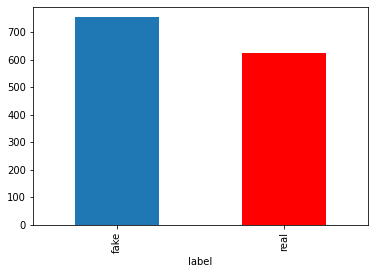

In [ ]:
#how many fake and real articles

print(final_data.groupby(['label'])['text'].count())
final_data.groupby(['label'])['text'].count().plot(kind="bar",color={'red','C0'})
plt.show()

#visualizing data using word cloud 
## What is the word cloud 
It's an image composed of words used in a particular text subject in which the size of each word indicates its frequency ot importance

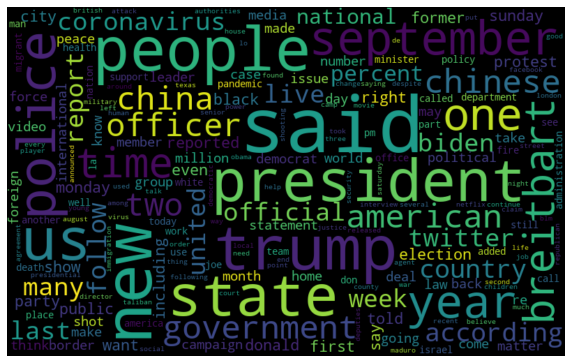

In [ ]:
#for fake news
from wordcloud import WordCloud

fake_data=final_data[final_data['label']=='fake']
all_words=' '.join([text for text in fake_data.text])

wordcloud=WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

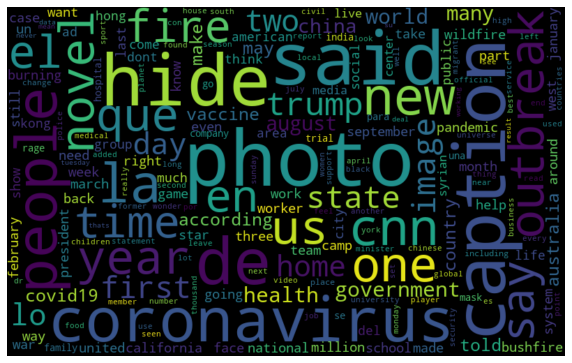

In [ ]:
#for real news
from wordcloud import WordCloud

real_data=final_data[final_data['label']=='real']
all_words=' '.join([text for text in real_data.text])

wordcloud=WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Most frequent words in fake news

## 1-By using tokenization :
splitting up a large body of text into smaller lines,words even creating  for a non-English language. The various tokenization functions in-built into the nltk module itself)
## 2-By using nltk.FreqDist():
FreqDist which gives you the frequency of words within a text

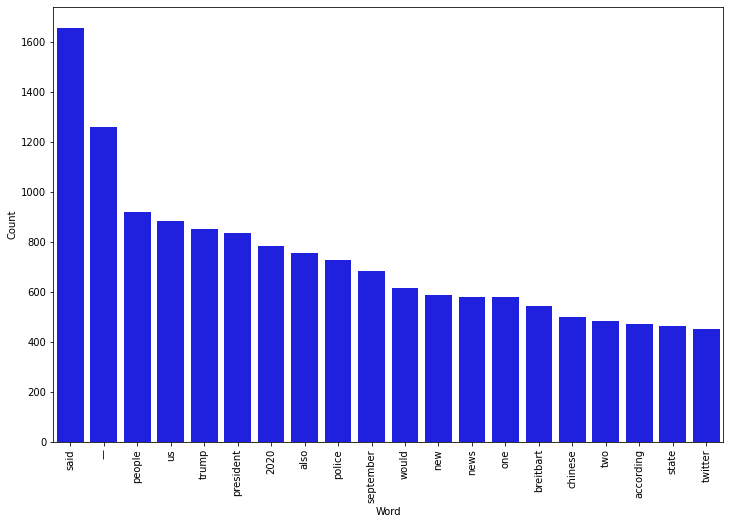

In [ ]:
from nltk import tokenize

#Tokenize a string on whitespace (space, tab, newline)
token_space=tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                "Frequency": list(frequency.values())})
    #using nlargest() to get the word with most high frequency 
    # n is the number of value to select
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

counter(final_data[final_data['label'] == 'fake'], 'text', 20)

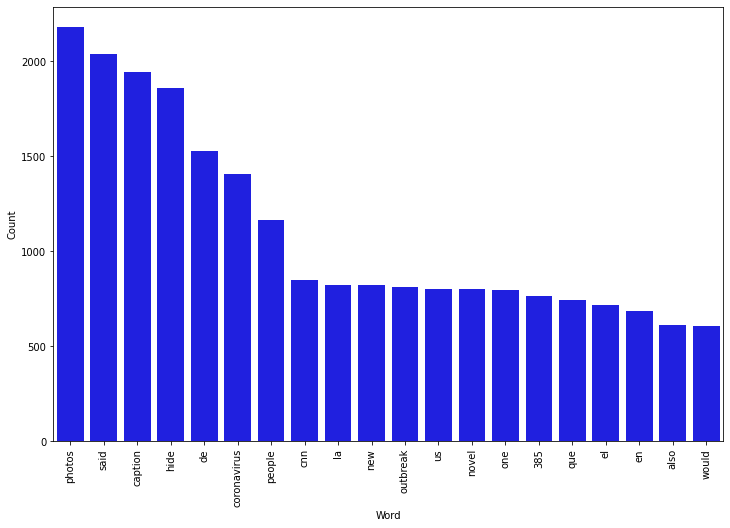

In [ ]:
#for real data
counter(final_data[final_data['label'] == 'real'], 'text', 20)

## Modeling
 the modeling process will consist of vectorizing the corpus stored in "text" column ,then applying TF-IDF and finally a classification machine learning 
 
## Vectorizing
You will first have to create a CountVectorizer to count the number of words (term frequency), limit your vocabulary size, apply stop words and etc

## TF-IDF
TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#spliting the data 
X_train,X_test,y_train,y_test=train_test_split(final_data['text'],final_data.label,test_size=0.2,random_state=42)

we are gonna use different algorithms for classification

## Logistic regression 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.57%


In [ ]:
prediction[0:6]

array(['real', 'real', 'fake', 'fake', 'real', 'real'], dtype=object)

In [ ]:
#The confusion matrix:
cm=confusion_matrix(y_test,prediction)
cm

array([[142,   8],
       [  7, 119]])

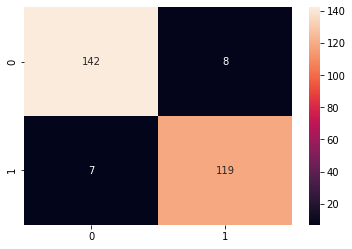

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

## using decision tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.93%


In [ ]:
#The confusion matrix:
cm=confusion_matrix(y_test,prediction)
cm

array([[148,   2],
       [ 12, 114]])

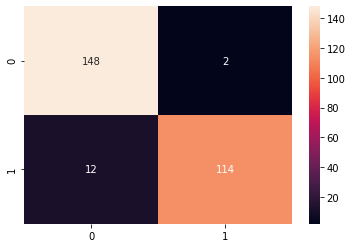

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

## Using Randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 92.75%


In [ ]:
#The confusion matrix:
cm=confusion_matrix(y_test,prediction)
cm

array([[147,   3],
       [ 17, 109]])

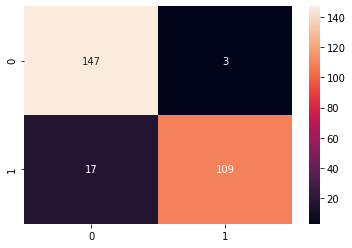

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

## Using Naive Bayes:

## What is Naive Bayes algorithm?

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
P(c) is the prior probability of class.
P(x|c) is the likelihood which is the probability of predictor given class.
P(x) is the prior probability of predictor.
 

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('to_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                 ('model', GaussianNB())])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 87.68%
